In [266]:
import pandas as pd
import numpy  as np

filename = 'data/05/data.csv'
data_cancer = pd.read_csv(filename)

### Dataframe types

In [267]:
#print("data types ", data_cancer.dtypes)

## Handle missing values

In [268]:
# get the number of missing data points per column
missing_values_count = data_cancer.isnull().sum()
missing_values_count

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean           49
concavity_mean              0
concave points_mean         0
symmetry_mean               0
fractal_dimension_mean     20
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se                0
concave points_se           0
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [209]:
# how many total missing values do we have?
total_cells = np.product(data_cancer.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.3789543057996485


### 1- Deleting Rows

In [46]:
data_cancer.dropna(inplace=True)
missing_values_count = data_cancer.isnull().sum()

print("missing value after droping rows ", missing_values_count.sum())

missing value after droping rows  0


### 2- Replacing With Mean/Median/Mode

In [213]:
filename = 'data/05/data.csv'
data_cancer = pd.read_csv(filename)

print("missing values before ", data_cancer["compactness_mean"].head(5))

mean = data_cancer["compactness_mean"].mean()
mode = data_cancer["compactness_mean"].mode()
median = data_cancer["compactness_mean"].median()

#print(mean, mode, median)

data_cancer["compactness_mean"] = data_cancer["compactness_mean"].replace(np.NaN, mean)

print("missing values after ", data_cancer["compactness_mean"].head(5))

data_cancer["compactness_mean"].isnull().sum()

missing values before  0    0.278
1    0.079
2    0.160
3      NaN
4      NaN
Name: compactness_mean, dtype: float64
missing values after  0    0.278
1    0.079
2    0.160
3    0.102
4    0.102
Name: compactness_mean, dtype: float64


0

### 3- Replacing all missing values

In [218]:
filename = 'data/05/data.csv'
data_cancer = pd.read_csv(filename)

missing_values_count = data_cancer.isnull().sum()

#print(missing_values_count)

new_data = data_cancer.copy()

# make new columns indicating what will be imputed
cols_with_missing = (col for col in new_data.columns 
                                 if new_data[col].isnull().any())

for col in cols_with_missing:
    mean = data_cancer[col].mean()
    data_cancer[col] = data_cancer[col].replace(np.NaN, mean)

missing_values_count = data_cancer.isnull().sum()

#print(missing_values_count)

## Descriptive Statistics

In [220]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)

description = data_cancer["compactness_mean"].describe()

print(description)

count    569.000
mean       0.102
std        0.050
min        0.019
25%        0.066
50%        0.098
75%        0.125
max        0.345
Name: compactness_mean, dtype: float64


## Class Distribution (Classification Only)

In [187]:
counts = data_cancer.groupby('diagnosis').size()
print(counts)

diagnosis
0    357
1    212
dtype: int64


## Correlations Between Attributes

In [222]:
set_option('display.width', 100)
set_option('precision', 3)
correlations = data_cancer.corr(method='pearson')
#print(correlations)

## Extract data from dataFrame

In [87]:
data_extracted = data_cancer.iloc[:, 1:8]
data_extracted

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,M,17.99,10.38,122.80,1001.0,0.118,2.776e-01
1,M,20.57,17.77,132.90,1326.0,0.085,7.864e-02
2,M,19.69,21.25,130.00,1203.0,0.110,1.599e-01
3,M,11.42,20.38,77.58,386.1,0.142,3.037e+07
4,M,20.29,14.34,135.10,1297.0,0.100,3.037e+07
...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.111,1.159e-01
565,M,20.13,28.25,131.20,1261.0,0.098,1.034e-01
566,M,16.60,28.08,108.30,858.1,0.085,1.023e-01
567,M,20.60,29.33,140.10,1265.0,0.118,2.770e-01


## Univariate Plots

### 1- Histogram

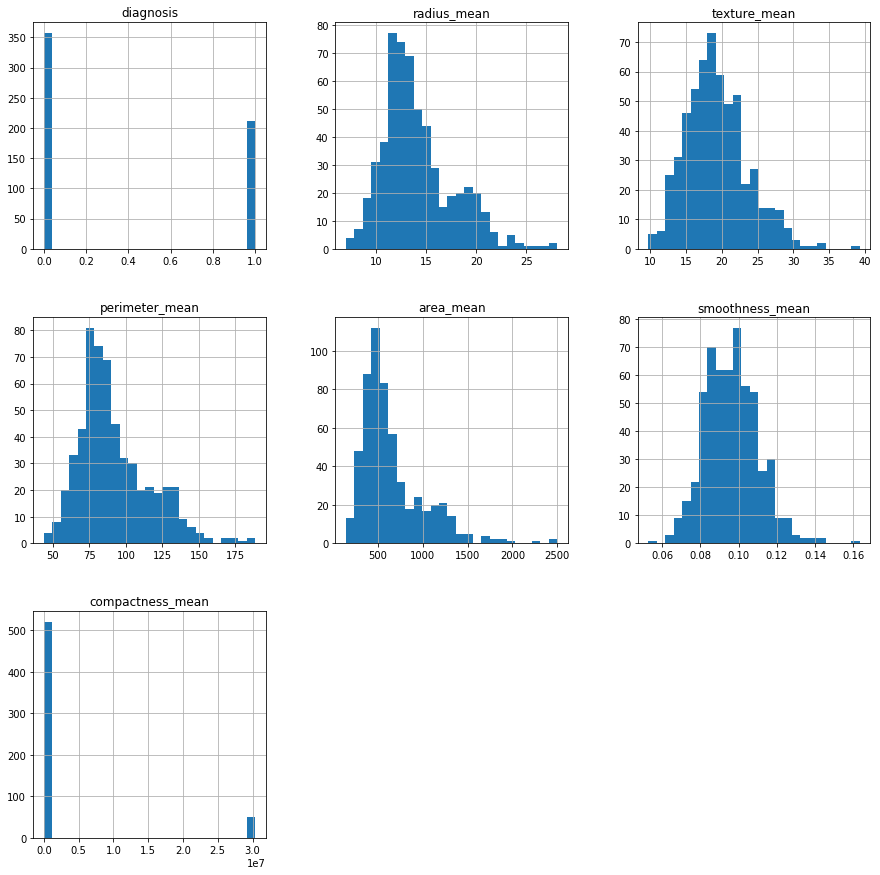

In [224]:
histogram = data_extracted.hist(figsize=(15,15), bins=25)

### 2- Density plot

/home/kissami/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


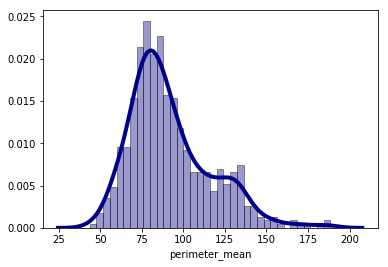

In [92]:
import seaborn as sns

perimeter_mean = sns.distplot(data_extracted["perimeter_mean"], hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})

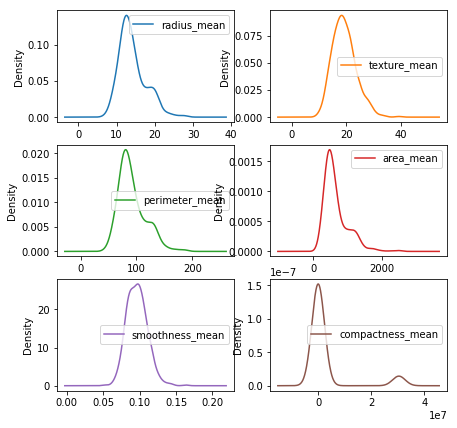

In [93]:
Density = data_extracted.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(7,7))

### 3- Box and Whisker Plots

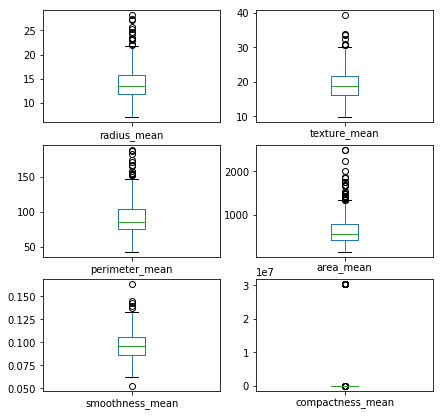

In [94]:
Box = data_extracted.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(7,7) )

## Multivariate Plots

### 1- Correlation Matrix Plot

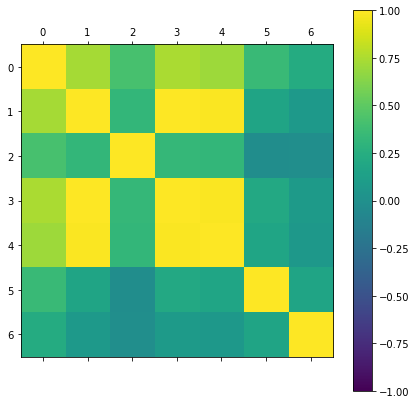

In [226]:
import matplotlib.pyplot as plt
# Correction Matrix Plot

correlations = data_extracted.corr()

# plot correlation matrix
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

### 2- Scatter Plot Matrix

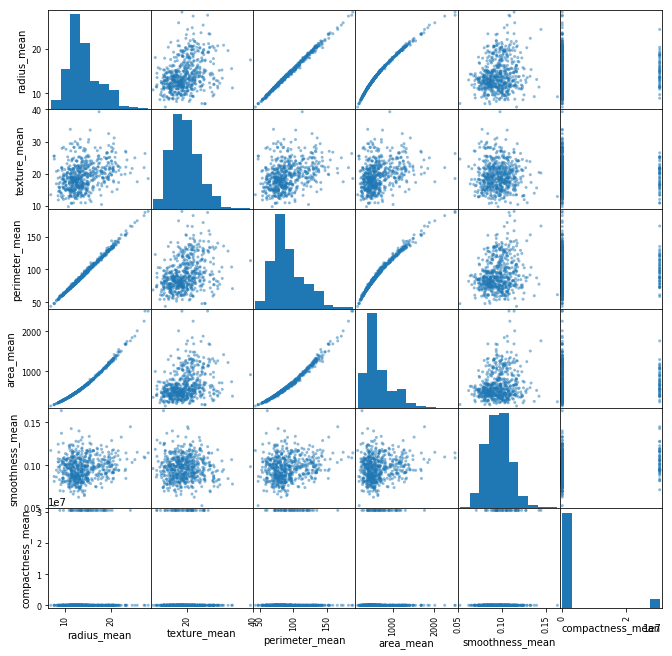

In [102]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_extracted, figsize=(11,11))
plt.show()

## Rescale Data

### Error !!!!

In [126]:
array = data_extracted.values

# separate array into input and output components
X = array[:,:]
Y = array[:,:]

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

ValueError: could not convert string to float: 'M'

In [228]:
from sklearn.preprocessing import LabelEncoder

def Encoder(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

Encoder(data_cancer)

#print(data_cancer.dtypes)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.118,0.278,0.300,0.147,...,25.380,17.33,184.60,2019.0,0.162,0.666,0.712,0.265,0.460,0.119
1,842517,1,20.57,17.77,132.90,1326.0,0.085,0.079,0.087,0.070,...,24.990,23.41,158.80,1956.0,0.124,0.187,0.242,0.186,0.275,0.089
2,84300903,1,19.69,21.25,130.00,1203.0,0.110,0.160,0.197,0.128,...,23.570,25.53,152.50,1709.0,0.144,0.424,0.450,0.243,0.361,0.088
3,84348301,1,11.42,20.38,77.58,386.1,0.142,0.102,0.241,0.105,...,14.910,26.50,98.87,567.7,0.210,0.866,0.687,0.258,0.664,0.173
4,84358402,1,20.29,14.34,135.10,1297.0,0.100,0.102,0.198,0.104,...,22.540,16.67,152.20,1575.0,0.137,0.205,0.400,0.163,0.236,0.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.111,0.116,0.244,0.139,...,25.450,26.40,166.10,2027.0,0.141,0.211,0.411,0.222,0.206,0.071
565,926682,1,20.13,28.25,131.20,1261.0,0.098,0.103,0.144,0.098,...,23.690,38.25,155.00,1731.0,0.117,0.192,0.322,0.163,0.257,0.066
566,926954,1,16.60,28.08,108.30,858.1,0.085,0.102,0.093,0.053,...,18.980,34.12,126.70,1124.0,0.114,0.309,0.340,0.142,0.222,0.078
567,927241,1,20.60,29.33,140.10,1265.0,0.118,0.277,0.351,0.152,...,25.740,39.42,184.60,1821.0,0.165,0.868,0.939,0.265,0.409,0.124


In [230]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

data_extracted = data_cancer.iloc[:, 1:8]

array = data_extracted.values

# separate array into input and output components
X = array[:,:]
Y = array[:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:8,:])

[[1.    0.521 0.023 0.546 0.364 0.594 0.792]
 [1.    0.643 0.273 0.616 0.502 0.29  0.182]
 [1.    0.601 0.39  0.596 0.449 0.514 0.431]
 [1.    0.21  0.361 0.234 0.103 0.811 0.254]
 [1.    0.63  0.157 0.631 0.489 0.43  0.254]
 [1.    0.259 0.203 0.268 0.142 0.679 0.254]
 [1.    0.533 0.347 0.524 0.38  0.379 0.254]
 [1.    0.318 0.376 0.321 0.184 0.598 0.254]]


## Standardize Data

In [231]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 1.298e+00  1.097e+00 -2.073e+00  1.270e+00  9.844e-01  1.568e+00
   3.528e+00]
 [ 1.298e+00  1.830e+00 -3.536e-01  1.686e+00  1.909e+00 -8.270e-01
  -4.745e-01]
 [ 1.298e+00  1.580e+00  4.562e-01  1.567e+00  1.559e+00  9.422e-01
   1.160e+00]
 [ 1.298e+00 -7.689e-01  2.537e-01 -5.927e-01 -7.645e-01  3.284e+00
   2.792e-16]
 [ 1.298e+00  1.750e+00 -1.152e+00  1.777e+00  1.826e+00  2.804e-01
   2.792e-16]]


## Normalize Data

In [264]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[-0.707 -0.707]
 [-0.894 -0.447]
 [-0.832 -0.555]
 [ 0.707  0.707]
 [ 0.894  0.447]]


## Binarize Data

In [146]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


## Univariate Selection

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [236]:
array = data_cancer.values
X = np.array(array[:,0:8], dtype=np.float32)
Y = np.array(array[:,1], dtype=np.float32)

# feature extraction
test = SelectKBest(score_func=chi2, k=2)

In [237]:
X_new = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print(X_new.scores_)

[4.623e+08 3.570e+02 2.661e+02 9.390e+01 2.011e+03 5.399e+04 1.499e-01
 4.365e+00]


In [192]:
features = X_new.transform(X)
print(features.shape)

(569, 2)


In [193]:
# summarize selected features
print(features[0:5,:])

[[8.423e+05 2.776e-01]
 [8.425e+05 7.864e-02]
 [8.430e+07 1.599e-01]
 [8.435e+07 3.037e+07]
 [8.436e+07 3.037e+07]]


## Recursive Feature Elimination

In [241]:
# feature extraction
model = LogisticRegression(solver='lbfgs', max_iter=200)

rfe = RFE(model , n_features_to_select=2)
fit = rfe.fit(X, Y)

In [242]:
print("Num Features:", fit.n_features_)
print("Selected Features", fit.support_)
print("Feature Ranking:", fit.ranking_)

Num Features: 2
Selected Features [ True False False False False  True False False]
Feature Ranking: [1 5 4 3 2 1 6 7]


## Principal Component Analysis

In [263]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
#X = np.array(array[:,0:8], dtype=np.float32)
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

[0.992 0.008]


In [258]:
#pca = PCA(n_components=3, svd_solver='full')
#pca.fit(X)

#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

In [262]:
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X)

# summarize components
print("Explained Variance:", fit.explained_variance_ratio_ )

print(fit.components_)

Explained Variance: [0.992 0.008]
[[-0.838 -0.545]
 [ 0.545 -0.838]]
